In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("kddcup.data.gz")
data.head()

,0,tcp,http,SF,215,45076,0.1,0.2,0.3,0.4,...,0.17,0.00.6,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,0.00.12,0.00.13,normal.
0,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,238,1282,0,0,0,0,...,5,1.0,0.0,0.20,0.0,0.0,0.0,0.0,0.0,normal.


Data processing starts

In [2]:
data.isnull().sum()

0          0
tcp        0
http       0
SF         0
215        0
45076      0
0.1        0
0.2        0
0.3        0
0.4        0
0.5        0
1          0
0.6        0
0.7        0
0.8        0
0.9        0
0.10       0
0.11       0
0.12       0
0.13       0
0.14       0
0.15       0
1.1        0
1.2        0
0.00       0
0.00.1     0
0.00.2     0
0.00.3     0
1.00       0
0.00.4     0
0.00.5     0
0.16       0
0.17       0
0.00.6     0
0.00.7     0
0.00.8     0
0.00.9     0
0.00.10    0
0.00.11    0
0.00.12    0
0.00.13    0
normal.    0
dtype: int64

In [3]:
with open('kddcup.names') as f:
    col=f.read()
    print(col)

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [4]:
cols = []
col=col.split("\n")[1:]
for i in col:
    if len(i) > 1:
        print(i.split(":")[0])
        cols.append(i.split(":")[0])
cols.append("target")

print(cols)

duration
protocol_type
service
flag
src_bytes
dst_bytes
land
wrong_fragment
urgent
hot
num_failed_logins
logged_in
num_compromised
root_shell
su_attempted
num_root
num_file_creations
num_shells
num_access_files
num_outbound_cmds
is_host_login
is_guest_login
count
srv_count
serror_rate
srv_serror_rate
rerror_rate
srv_rerror_rate
same_srv_rate
diff_srv_rate
srv_diff_host_rate
dst_host_count
dst_host_srv_count
dst_host_same_srv_rate
dst_host_diff_srv_rate
dst_host_same_src_port_rate
dst_host_srv_diff_host_rate
dst_host_serror_rate
dst_host_srv_serror_rate
dst_host_rerror_rate
dst_host_srv_rerror_rate
['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',

In [5]:
col_names=['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land',
'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'target']
data.columns=col_names
print(data.head())

   duration protocol_type service flag  src_bytes  dst_bytes  land  \
0         0           tcp    http   SF        162       4528     0   
1         0           tcp    http   SF        236       1228     0   
2         0           tcp    http   SF        233       2032     0   
3         0           tcp    http   SF        239        486     0   
4         0           tcp    http   SF        238       1282     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                   1   
1               0       0    0  ...                   2   
2               0       0    0  ...                   3   
3               0       0    0  ...                   4   
4               0       0    0  ...                   5   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     1.0                     0.0   
1                     1.0                     0.0   
2                     1.0                     0.0   
3           

In [6]:
with open('training_attack_types') as f:
    attack_types=f.read()
    print(attack_types)

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [7]:
attacks_types = {
'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

In [8]:
data['Attack Type'] = data.target.apply(lambda r:attacks_types[r[:-1]])

data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,162,4528,0,0,0,0,...,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,236,1228,0,0,0,0,...,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,233,2032,0,0,0,0,...,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,238,1282,0,0,0,0,...,1.0,0.0,0.20,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [9]:
data['Attack Type'].unique()

array(['normal', 'u2r', 'dos', 'r2l', 'probe'], dtype=object)

In [10]:
data['Attack Type'].value_counts()

dos       3883370
normal     972780
probe       41102
r2l          1126
u2r            52
Name: Attack Type, dtype: int64

In [11]:
data['protocol_type'].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [12]:
data['flag'].unique()


array(['SF', 'S2', 'S1', 'S3', 'OTH', 'REJ', 'RSTO', 'S0', 'RSTR',
       'RSTOS0', 'SH'], dtype=object)

In [13]:
data['service'].unique()

array(['http', 'smtp', 'domain_u', 'auth', 'finger', 'telnet', 'eco_i',
       'ftp', 'ntp_u', 'ecr_i', 'other', 'urp_i', 'private', 'pop_3',
       'ftp_data', 'netstat', 'daytime', 'ssh', 'echo', 'time', 'name',
       'whois', 'domain', 'mtp', 'gopher', 'remote_job', 'rje', 'ctf',
       'supdup', 'link', 'systat', 'discard', 'X11', 'shell', 'login',
       'imap4', 'nntp', 'uucp', 'pm_dump', 'IRC', 'Z39_50', 'netbios_dgm',
       'ldap', 'sunrpc', 'courier', 'exec', 'bgp', 'csnet_ns', 'http_443',
       'klogin', 'printer', 'netbios_ssn', 'pop_2', 'nnsp', 'efs',
       'hostnames', 'uucp_path', 'sql_net', 'vmnet', 'iso_tsap',
       'netbios_ns', 'kshell', 'urh_i', 'http_2784', 'harvest', 'aol',
       'tftp_u', 'http_8001', 'tim_i', 'red_i'], dtype=object)

Data visualization of categorical data

In [14]:
def bar_graph(feature):
    data[feature].value_counts().plot(kind="bar")

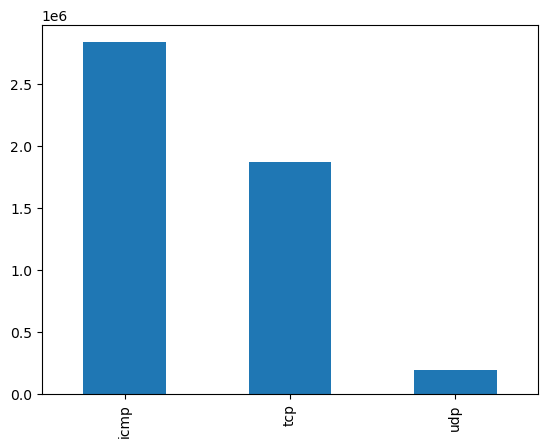

In [15]:
bar_graph('protocol_type')

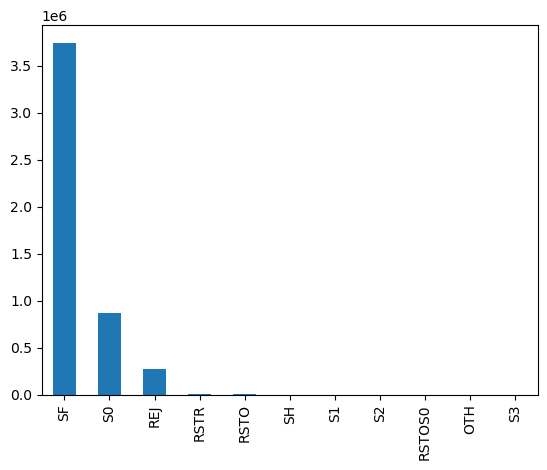

In [16]:
bar_graph('flag')

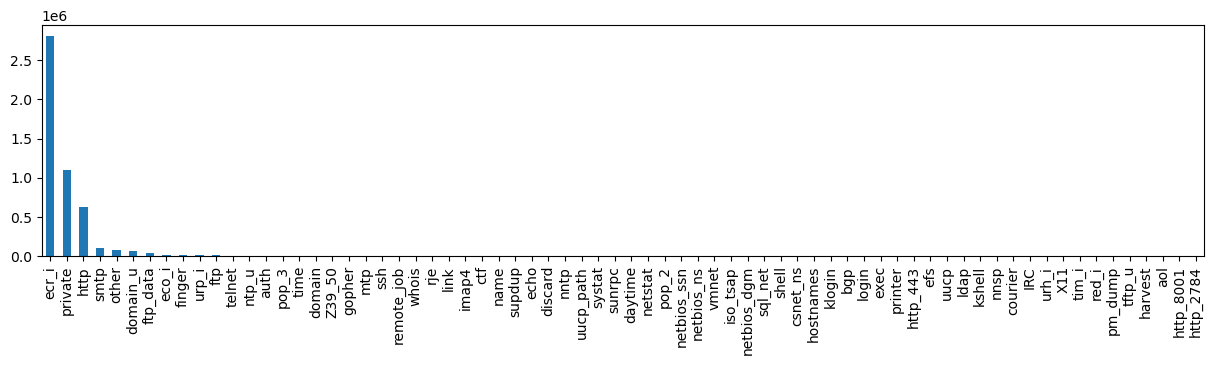

In [17]:
plt.figure(figsize=(15,3))
bar_graph('service')

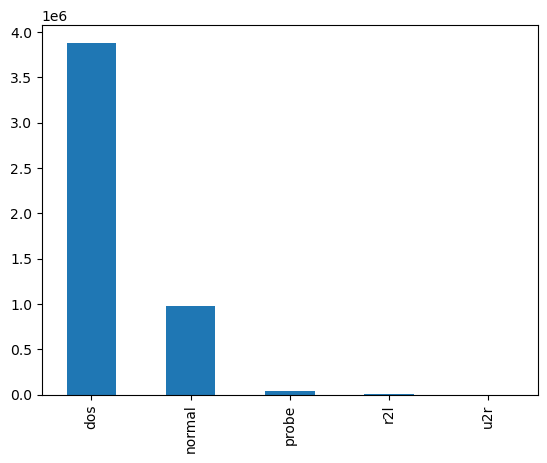

In [18]:
bar_graph("Attack Type")

In [19]:
print(data.columns)

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')


Encoding the categorical values into numerical values using label encoder

In [20]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()


In [21]:
data['service']=encoder.fit_transform(data['service'])
data['protocol_type']=encoder.fit_transform(data['protocol_type'])
data['flag']=encoder.fit_transform(data['flag'])
data['Attack Type']=encoder.fit_transform(data['Attack Type'])

In [22]:
data['Attack Type'].value_counts()

0    3883370
1     972780
2      41102
3       1126
4         52
Name: Attack Type, dtype: int64

In [23]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,1,24,9,162,4528,0,0,0,0,...,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.,1
1,0,1,24,9,236,1228,0,0,0,0,...,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.,1
2,0,1,24,9,233,2032,0,0,0,0,...,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.,1
3,0,1,24,9,239,486,0,0,0,0,...,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.,1
4,0,1,24,9,238,1282,0,0,0,0,...,1.0,0.0,0.20,0.0,0.0,0.0,0.0,0.0,normal.,1


data correlation to find relation between features

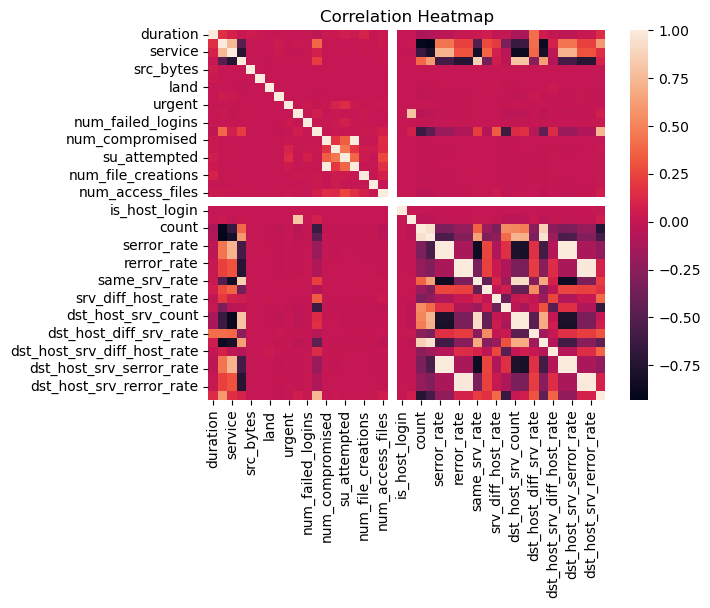

In [24]:
corr = data.corr()
sns.heatmap(corr)
plt.title('Correlation Heatmap')
plt.show()


In [25]:
data.corr()['Attack Type']

duration                       0.137570
protocol_type                  0.598821
service                        0.153258
flag                           0.094992
src_bytes                      0.004708
dst_bytes                      0.004716
land                           0.000187
wrong_fragment                -0.007552
urgent                         0.002584
hot                            0.060602
num_failed_logins              0.015627
logged_in                      0.740847
num_compromised                0.003578
root_shell                     0.020078
su_attempted                   0.008343
num_root                       0.005985
num_file_creations             0.018128
num_shells                     0.016952
num_access_files               0.052337
num_outbound_cmds                   NaN
is_host_login                  0.001156
is_guest_login                 0.062573
count                         -0.739154
srv_count                     -0.577225
serror_rate                   -0.223440


In [26]:
data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

droping unwanted values

In [27]:
col_drop=['count','srv_count','serror_rate','dst_host_same_src_port_rate','dst_host_count']
data=data.drop(col_drop,axis=1)

In [28]:
col_drop1=['num_outbound_cmds','dst_host_serror_rate','dst_host_srv_serror_rate','wrong_fragment','srv_serror_rate']
data=data.drop(col_drop1,axis=1)

In [29]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,urgent,hot,num_failed_logins,...,diff_srv_rate,srv_diff_host_rate,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_srv_diff_host_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,1,24,9,162,4528,0,0,0,0,...,0.0,0.0,1,1.0,0.0,0.0,0.0,0.0,normal.,1
1,0,1,24,9,236,1228,0,0,0,0,...,0.0,0.0,2,1.0,0.0,0.0,0.0,0.0,normal.,1
2,0,1,24,9,233,2032,0,0,0,0,...,0.0,0.0,3,1.0,0.0,0.0,0.0,0.0,normal.,1
3,0,1,24,9,239,486,0,0,0,0,...,0.0,0.0,4,1.0,0.0,0.0,0.0,0.0,normal.,1
4,0,1,24,9,238,1282,0,0,0,0,...,0.0,0.0,5,1.0,0.0,0.0,0.0,0.0,normal.,1


defining x and y values

In [30]:
x=data.drop(['target','Attack Type'],axis=1)
y=data['Attack Type'].values



splitting data into train and test data

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

Decision tree classifier model

In [32]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [33]:
y_pred=model.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score
print("accuracy:",accuracy_score(y_test,y_pred))

accuracy: 0.999942838827951


In [35]:
from sklearn.metrics import classification_report
print("Classification_report:",classification_report(y_test,y_pred))

Classification_report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00    776463
           1       1.00      1.00      1.00    194686
           2       1.00      1.00      1.00      8327
           3       0.97      0.95      0.96       200
           4       0.60      0.30      0.40        10

    accuracy                           1.00    979686
   macro avg       0.91      0.85      0.87    979686
weighted avg       1.00      1.00      1.00    979686



In [36]:
from sklearn.metrics import confusion_matrix
print("confusion_matrix:",confusion_matrix(y_test,y_pred))

confusion_matrix: [[776460      2      1      0      0]
 [     6 194660     13      6      1]
 [     2      9   8316      0      0]
 [     0      8      0    191      1]
 [     0      7      0      0      3]]


Naive Bayes model

In [37]:
from sklearn.naive_bayes import GaussianNB
model1=GaussianNB()
model1.fit(x_train,y_train)

GaussianNB()

In [38]:
y_pred1=model1.predict(x_test)

In [39]:
from sklearn.metrics import accuracy_score
print("accuracy:",accuracy_score(y_test,y_pred1))

accuracy: 0.8765931124870622


In [40]:
from sklearn.metrics import classification_report
print("Classification_report:",classification_report(y_test,y_pred1))

Classification_report:               precision    recall  f1-score   support

           0       0.87      1.00      0.93    776463
           1       0.99      0.42      0.59    194686
           2       0.10      0.02      0.04      8327
           3       0.00      0.00      0.00       200
           4       0.02      0.40      0.04        10

    accuracy                           0.88    979686
   macro avg       0.40      0.37      0.32    979686
weighted avg       0.89      0.88      0.85    979686



In [41]:
from sklearn.metrics import confusion_matrix
print("confusion_matrix:",confusion_matrix(y_test,y_pred1))

confusion_matrix: [[776031    432      0      0      0]
 [110039  82564   1700    177    206]
 [  8119     21    187      0      0]
 [   120     50     28      0      2]
 [     3      3      0      0      4]]


RandomForestClassifier model

In [42]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier()
model2.fit(x_train,y_train)

RandomForestClassifier()

In [43]:
y_pred2=model2.predict(x_test)

In [44]:
from sklearn.metrics import accuracy_score
print("accuracy:",accuracy_score(y_test,y_pred2))

accuracy: 0.9999663157378997


In [45]:
from sklearn.metrics import classification_report
print("Classification_report:",classification_report(y_test,y_pred2))

Classification_report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00    776463
           1       1.00      1.00      1.00    194686
           2       1.00      1.00      1.00      8327
           3       1.00      0.95      0.97       200
           4       0.75      0.30      0.43        10

    accuracy                           1.00    979686
   macro avg       0.95      0.85      0.88    979686
weighted avg       1.00      1.00      1.00    979686



In [46]:
from sklearn.metrics import confusion_matrix
print("confusion_matrix:",confusion_matrix(y_test,y_pred2))

confusion_matrix: [[776461      2      0      0      0]
 [     6 194680      0      0      0]
 [     1      7   8319      0      0]
 [     0      9      0    190      1]
 [     0      7      0      0      3]]


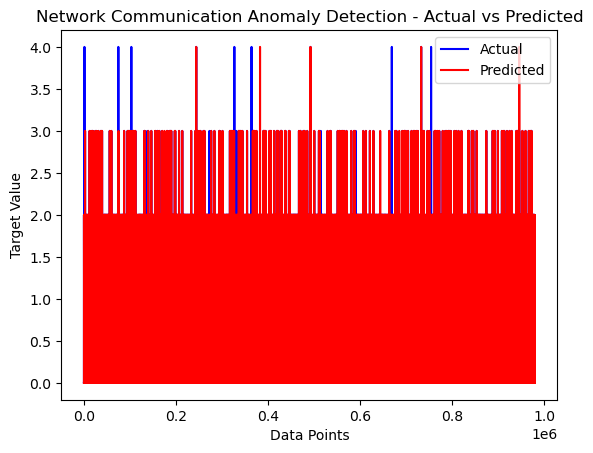

In [47]:
plt.plot(y_test, color='blue', label='Actual')
plt.plot(y_pred, color='red', label='Predicted')
plt.xlabel('Data Points')
plt.ylabel('Target Value')
plt.title('Network Communication Anomaly Detection - Actual vs Predicted')
plt.legend()
plt.show()


Testing data preprocessing

In [48]:
test = pd.read_csv('kddcup.testdata.unlabeled.gz')
test.head()

,0,udp,private,SF,105,146,0.1,0.2,0.3,0.4,...,1.2,1.3,1.00.1,0.00.6,1.00.2,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11
0,0,udp,private,SF,105,146,0,0,0,0,...,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0
1,0,udp,private,SF,105,146,0,0,0,0,...,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0
2,0,udp,private,SF,105,146,0,0,0,0,...,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0
3,0,udp,private,SF,105,146,0,0,0,0,...,255,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0
4,0,udp,private,SF,105,146,0,0,0,0,...,255,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0


In [49]:
col_names=['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land',
                'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
                'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
                'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
                'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
                'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
                'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
                'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
                'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']
test.columns=col_names


In [50]:
test.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [51]:
test.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [52]:
test['service']=encoder.fit_transform(test['service'])
test['protocol_type']=encoder.fit_transform(test['protocol_type'])
test['flag']=encoder.fit_transform(test['flag'])

In [53]:
col_drop=['count','srv_count','serror_rate','dst_host_same_src_port_rate','dst_host_count']
test=test.drop(col_drop,axis=1)

In [54]:
col_drop1=['num_outbound_cmds','dst_host_serror_rate','dst_host_srv_serror_rate','wrong_fragment','srv_serror_rate']
test=test.drop(col_drop1,axis=1)

In [55]:
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,urgent,hot,num_failed_logins,...,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_srv_diff_host_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,2,50,9,105,146,0,0,0,0,...,0.0,1.0,0.0,0.0,254,1.0,0.01,0.0,0.0,0.0
1,0,2,50,9,105,146,0,0,0,0,...,0.0,1.0,0.0,0.0,254,1.0,0.01,0.0,0.0,0.0
2,0,2,50,9,105,146,0,0,0,0,...,0.0,1.0,0.0,0.0,254,1.0,0.01,0.0,0.0,0.0
3,0,2,50,9,105,146,0,0,0,0,...,0.0,1.0,0.0,0.0,254,1.0,0.01,0.0,0.0,0.0
4,0,2,50,9,105,146,0,0,0,0,...,0.0,1.0,0.0,0.0,254,1.0,0.01,0.0,0.0,0.0


prediction of test data

In [56]:
y_pred3=model2.predict(test)

In [57]:
print(y_pred3)

[1 1 1 ... 1 1 1]


email generation when anomalies detected 

In [64]:
import smtplib
anomaly_count = 0
anomaly_details = []

for i in range(len(y_pred3)):
    if y_pred[i] != 1:
        anomaly_count += 1
        anomaly_features = test.iloc[i] 
        
        print("Anomaly Detected!")
        print("Anomaly Features:", anomaly_features)
        anomaly_details.append(str(anomaly_features))

    if anomaly_count == 5:
        sender_email = 'spraveen.961435@gmail.com'
        sender_password = ''#password
        receiver_email = 'praveen.spk8247@gmail.com'
        smtp_server = 'smtp.gmail.com'
        smtp_port = 587
        
        def send_email():
            subject = 'Anomalies Detected'
            body = 'Anomalies have been detected. Here are the details:\n\n' + '\n\n'.join(anomaly_details)
            
            message = f'Subject: {subject}\n\n{body}'
            
            try:
                with smtplib.SMTP(smtp_server, smtp_port) as server:
                    server.starttls()
                    server.login(sender_email, sender_password)
                    server.sendmail(sender_email, receiver_email, message)
                    print('Email sent successfully.')
            except smtplib.SMTPException as e:
                print(f'Error sending email: {e}')
        
        send_email()
        break


Anomaly Detected!
Anomaly Features: duration                         0.00
protocol_type                    2.00
service                         50.00
flag                             9.00
src_bytes                      105.00
dst_bytes                      146.00
land                             0.00
urgent                           0.00
hot                              0.00
num_failed_logins                0.00
logged_in                        0.00
num_compromised                  0.00
root_shell                       0.00
su_attempted                     0.00
num_root                         0.00
num_file_creations               0.00
num_shells                       0.00
num_access_files                 0.00
is_host_login                    0.00
is_guest_login                   0.00
rerror_rate                      0.00
srv_rerror_rate                  0.00
same_srv_rate                    1.00
diff_srv_rate                    0.00
srv_diff_host_rate               0.00
dst_host_srv_c